In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [25]:
path = Path.cwd().parent
filePath = str(path) + "/data_cleanup/second_dataset/train_data_price_corrected.parquet"
df = pd.read_parquet(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10305 entries, 0 to 31633
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   reservation_id           10305 non-null  int64         
 1   stay_date                10305 non-null  datetime64[ns]
 2   guest_id                 10305 non-null  int64         
 3   guest_country_id         10305 non-null  object        
 4   reservation_status       10305 non-null  object        
 5   reservation_date         10305 non-null  datetime64[ns]
 6   date_from                10305 non-null  datetime64[ns]
 7   date_to                  10305 non-null  datetime64[ns]
 8   cancel_date              0 non-null      object        
 9   room_cnt                 10305 non-null  int64         
 10  adult_cnt                10305 non-null  int64         
 11  children_cnt             10305 non-null  int64         
 12  price                    10305 non-nu

In [26]:
df['reservation_status'].unique()

array(['Checked-out'], dtype=object)

In [27]:
df_checkedOut = df[df['reservation_status'] == 'Checked-out']

In [28]:
df_checkedOut.to_csv('data_Checked-out.csv', index=False)

In [29]:
df_checkedOut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10305 entries, 0 to 31633
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   reservation_id           10305 non-null  int64         
 1   stay_date                10305 non-null  datetime64[ns]
 2   guest_id                 10305 non-null  int64         
 3   guest_country_id         10305 non-null  object        
 4   reservation_status       10305 non-null  object        
 5   reservation_date         10305 non-null  datetime64[ns]
 6   date_from                10305 non-null  datetime64[ns]
 7   date_to                  10305 non-null  datetime64[ns]
 8   cancel_date              0 non-null      object        
 9   room_cnt                 10305 non-null  int64         
 10  adult_cnt                10305 non-null  int64         
 11  children_cnt             10305 non-null  int64         
 12  price                    10305 non-nu

In [30]:
df_checkedOut_2008 = df_checkedOut[df_checkedOut['date_from'].dt.year == 2008]
df_checkedOut_2008.head()

,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,cancel_date,room_cnt,...,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night,guest_count,nightly_price_per_guest
2,74464,2008-01-01,106278,HR,Checked-out,2007-12-29,2008-01-01,2008-01-02,None,1,...,530.929,53.071,14897.037,3319.383,4,4.0,1.0,4336.857,2,2168.428500
6,74470,2008-01-01,38936,GB,Checked-out,2007-12-29,2008-01-01,2008-01-02,None,1,...,1592.714,159.286,262.800,0.000,4,3.0,1.0,8536.766,3,2845.588667
7,74460,2008-01-01,38936,GB,Checked-out,2007-12-29,2008-01-01,2008-01-02,None,1,...,1592.714,159.286,262.800,0.000,5,3.0,1.0,8536.766,3,2845.588667
8,74493,2008-01-01,106460,HR,Checked-out,2008-01-01,2008-01-01,2008-01-02,None,1,...,530.929,53.071,985.135,197.465,4,4.0,1.0,3996.239,2,1998.119500
9,74495,2008-01-01,106471,AUT,Checked-out,2008-01-01,2008-01-01,2008-01-02,None,1,...,530.929,53.071,11530.642,2521.858,7,3.0,1.0,4336.857,2,2168.428500


In [31]:
df_checekedOut_2009 = df_checkedOut[df_checkedOut['date_from'].dt.year == 2009]

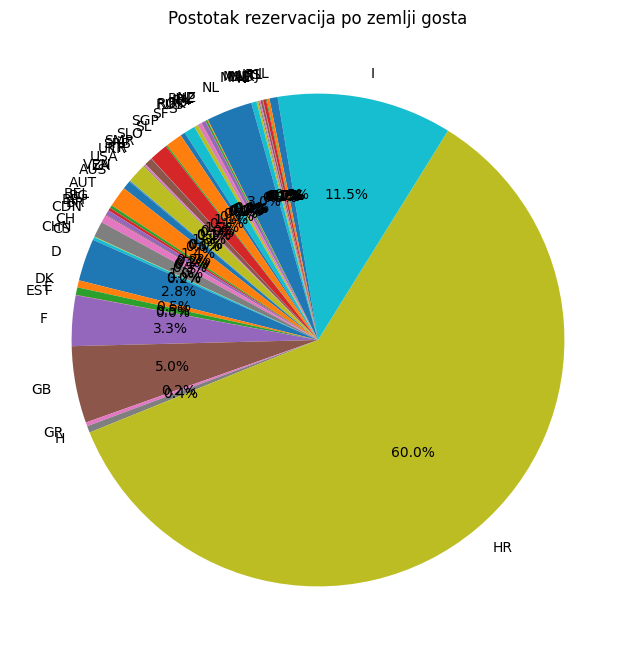

In [32]:
frekvencija_po_zemlji = df_checkedOut_2008['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

In [33]:
df_null = df_checkedOut[df_checkedOut['price_per_night'].isna()]
df_null.head(100)

,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,cancel_date,room_cnt,...,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night,guest_count,nightly_price_per_guest


In [34]:
dnevni_pregled = df_checkedOut.groupby(df_checkedOut['date_from'].dt.date).agg(
    adult_cnt=pd.NamedAgg(column='adult_cnt', aggfunc='sum')
).reset_index()
dnevni_pregled.head()

,date_from,adult_cnt
0,2007-12-13,1
1,2008-01-01,44
2,2008-01-02,4
3,2008-01-03,22
4,2008-01-04,19


In [35]:
dnevni_pregled['date_from'] = pd.to_datetime(dnevni_pregled['date_from'])
dnevni_pregled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_from  730 non-null    datetime64[ns]
 1   adult_cnt  730 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


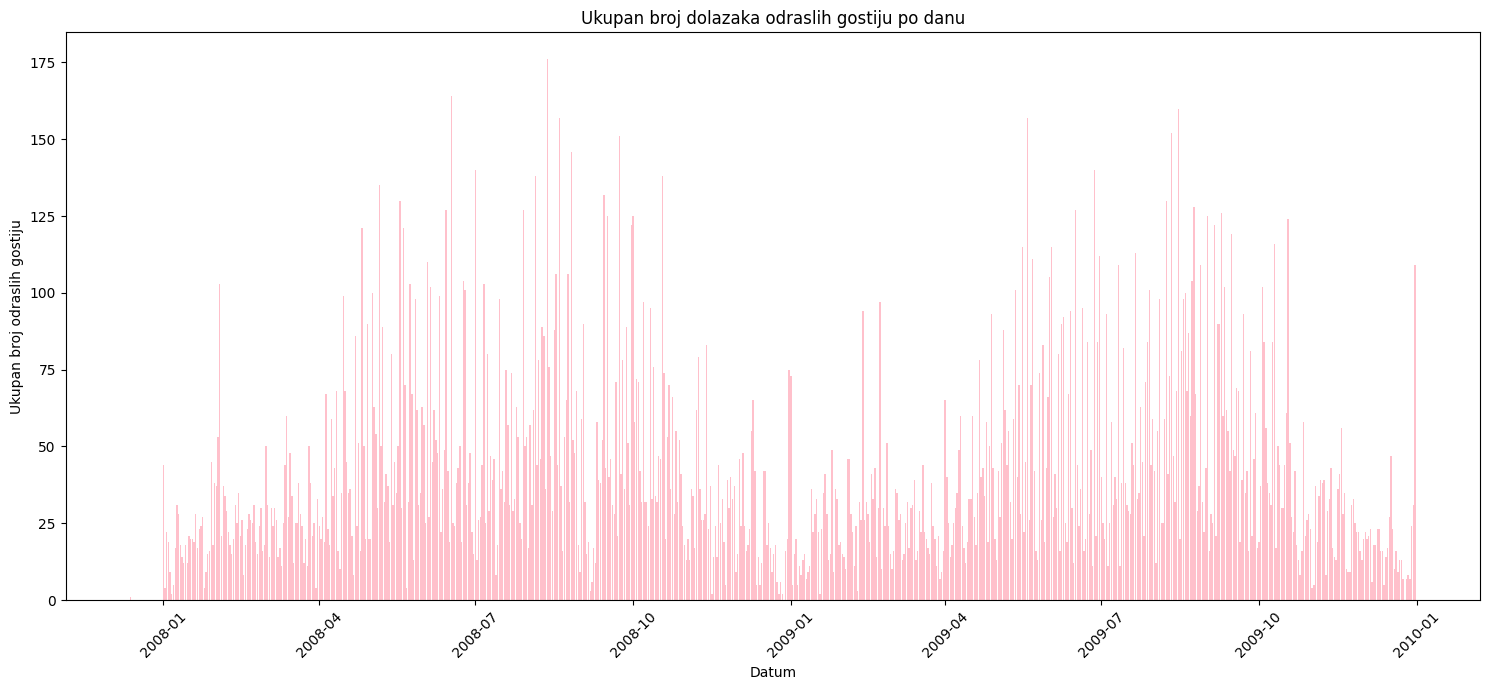

In [36]:
plt.figure(figsize=(15, 7)) 
plt.bar(dnevni_pregled['date_from'], dnevni_pregled['adult_cnt'], color='pink')
plt.title('Ukupan broj dolazaka odraslih gostiju po danu')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj odraslih gostiju')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

In [37]:
dnevni_pregled_2008 = dnevni_pregled[dnevni_pregled['date_from'].dt.year == 2008]
dnevni_pregled_2008['date_from']= pd.to_datetime(dnevni_pregled_2008['date_from'])

In [38]:
dnevni_pregled_2009 = dnevni_pregled[dnevni_pregled['date_from'].dt.year == 2009]
dnevni_pregled_2009['date_from']= pd.to_datetime(dnevni_pregled_2009['date_from'])

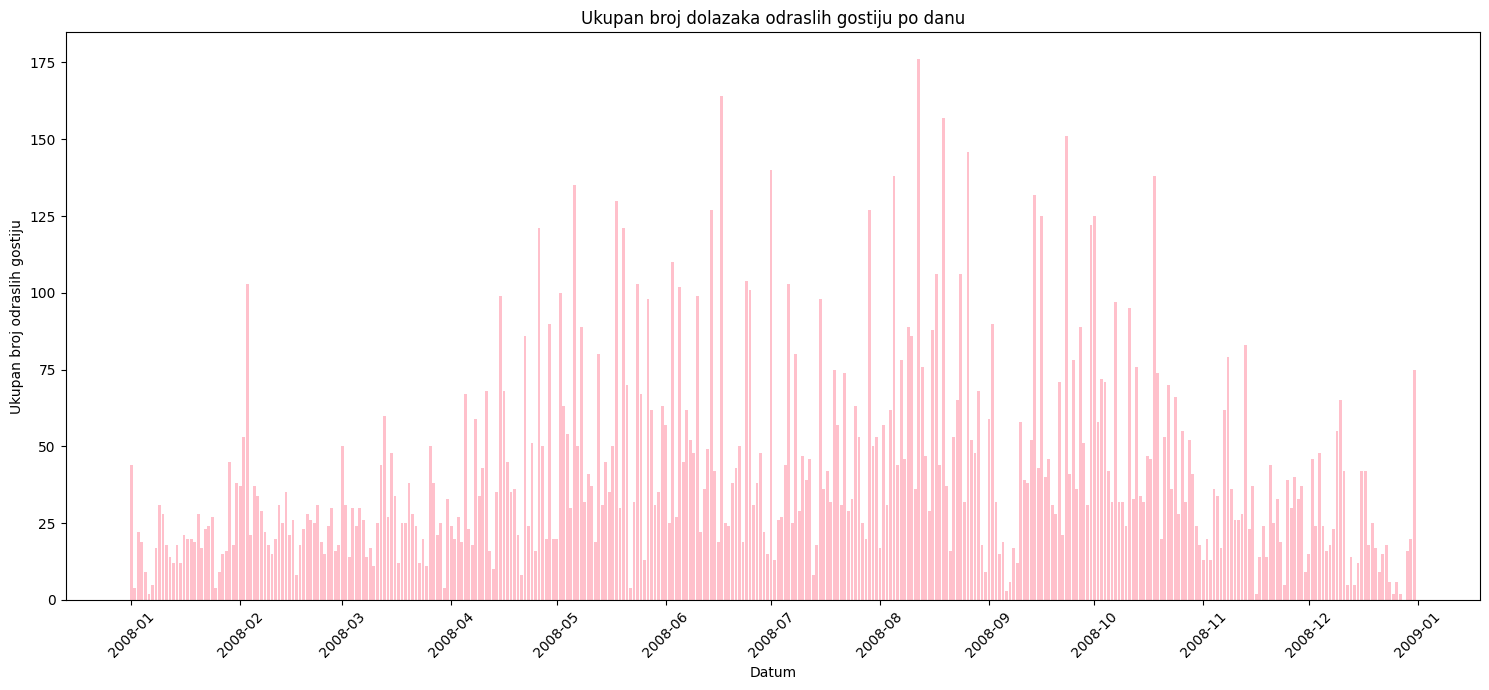

In [39]:
plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(dnevni_pregled_2008['date_from'], dnevni_pregled_2008['adult_cnt'], color='pink')
plt.title('Ukupan broj dolazaka odraslih gostiju po danu')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj odraslih gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.show()

In [40]:
february = dnevni_pregled_2008[dnevni_pregled_2008['date_from'].dt.month == 2]

In [41]:
february

,date_from,adult_cnt
32,2008-02-01,37
33,2008-02-02,53
34,2008-02-03,103
35,2008-02-04,21
36,2008-02-05,37
37,2008-02-06,34
38,2008-02-07,29
39,2008-02-08,22
40,2008-02-09,18
41,2008-02-10,15


In [42]:
third_february = df_checkedOut_2008[df_checkedOut_2008['date_from'].dt.month == 2]
third_february

,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,cancel_date,room_cnt,...,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night,guest_count,nightly_price_per_guest
951,75205,2008-02-01,107046,HR,Checked-out,2008-02-01,2008-02-01,2008-02-02,None,3,...,935.787,93.513,572.174,92.126,5,3.0,1.0,13203.9480,3,4401.31600
955,75204,2008-02-01,61987,HR,Checked-out,2008-02-01,2008-02-01,2008-02-02,None,1,...,42.730,4.270,7.000,0.000,6,4.0,1.0,816.3600,1,816.36000
958,75184,2008-02-01,19577,HR,Checked-out,2008-02-01,2008-02-01,2008-02-02,None,2,...,623.858,62.342,893.374,92.126,5,4.0,1.0,11014.9700,2,5507.48500
963,75202,2008-02-01,8652,HR,Checked-out,2008-02-01,2008-02-01,2008-02-02,None,1,...,311.929,31.171,51.100,0.000,2,4.0,1.0,4401.3160,1,4401.31600
965,75073,2008-02-01,106966,HR,Checked-out,2008-01-29,2008-02-01,2008-02-02,None,2,...,1247.570,124.830,204.400,0.000,5,10.0,1.0,10391.1120,4,2597.77800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,75910,2008-02-29,619,HR,Checked-out,2008-02-28,2008-02-29,2008-03-05,None,1,...,1247.643,124.757,4226.700,0.000,5,10.0,5.0,1104.6214,1,1104.62140
2209,75932,2008-02-29,23589,I,Checked-out,2008-02-29,2008-02-29,2008-03-10,None,1,...,2807.288,280.612,1113.761,149.139,3,1.0,10.0,2709.2417,2,1354.62085
2215,75937,2008-02-29,23476,HR,Checked-out,2008-02-29,2008-02-29,2008-03-01,None,1,...,311.929,31.171,51.100,0.000,6,10.0,1.0,5539.8970,1,5539.89700
2217,75892,2008-02-29,107613,HR,Checked-out,2008-02-28,2008-02-29,2008-03-01,None,1,...,311.929,31.171,649.481,131.619,2,10.0,1.0,4427.5960,1,4427.59600


3. veljače 2008 odrzao se 25. međunarodni Riječki karneval, slijedi analiza povecanja broja gostiju
na taj dan i utjecaja Riječkog karnevala na popunjenost hotela

In [43]:
third_february = third_february[third_february['date_from'].dt.day == 3]
pd.set_option('display.max_columns', None)
third_february

,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,cancel_date,room_cnt,adult_cnt,children_cnt,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night,guest_count,nightly_price_per_guest
1047,74985,2008-02-03,106779,HR,Checked-out,2008-01-24,2008-02-03,2008-02-04,None,1,2,0,1114.550,111.450,120.000,1271.000,85.450,8.550,71.000,0.000,6,10.0,1.0,1114.5500,2,557.275000
1052,75253,2008-02-03,18727,HR,Checked-out,2008-02-03,2008-02-03,2008-02-04,None,1,1,0,4383.723,438.365,469.536,4746.752,311.929,31.171,51.100,0.000,2,4.0,1.0,4383.7230,1,4383.723000
1056,74856,2008-02-03,37692,HR,Checked-out,2008-01-19,2008-02-03,2008-02-04,None,29,44,0,194408.782,19440.192,23651.051,240068.603,26512.067,2651.433,19147.754,1559.426,5,3.0,1.0,194408.7820,44,4418.381409
1057,70896,2008-02-03,38936,GB,Checked-out,2007-08-14,2008-02-03,2008-02-05,None,15,21,0,41039.724,4104.206,6013.229,60132.801,6550.071,655.029,12543.006,1253.994,5,3.0,2.0,20519.8620,21,977.136286
1061,75250,2008-02-03,107058,HR,Checked-out,2008-02-03,2008-02-03,2008-02-04,None,1,3,0,1216.360,121.640,147.080,1709.920,128.180,12.820,365.380,12.620,5,4.0,1.0,1216.3600,3,405.453333
1063,75168,2008-02-03,89323,HR,Checked-out,2008-01-31,2008-02-03,2008-02-05,None,1,2,0,9198.657,919.873,982.288,9924.642,623.785,62.415,102.200,0.000,4,10.0,2.0,4599.3285,2,2299.664250
1064,75218,2008-02-03,88747,HR,Checked-out,2008-02-02,2008-02-03,2008-02-05,None,1,2,0,3034.950,303.500,312.050,3134.400,85.450,8.550,14.000,0.000,11,4.0,2.0,1517.4750,2,758.737500
1069,75254,2008-02-03,107100,HR,Checked-out,2008-02-03,2008-02-03,2008-02-04,None,1,1,0,4383.723,438.365,561.662,5165.626,311.929,31.171,469.974,92.126,2,4.0,1.0,4383.7230,1,4383.723000
1074,74918,2008-02-03,35307,HR,Checked-out,2008-01-22,2008-02-03,2008-02-04,None,9,18,0,46564.875,4656.159,5217.894,53098.740,5614.065,561.735,919.800,0.000,5,10.0,1.0,46564.8750,18,2586.937500
1077,75257,2008-02-03,107167,HR,Checked-out,2008-02-03,2008-02-03,2008-02-04,None,1,2,0,946.360,94.640,103.190,1045.810,85.450,8.550,14.000,0.000,5,4.0,1.0,946.3600,2,473.180000


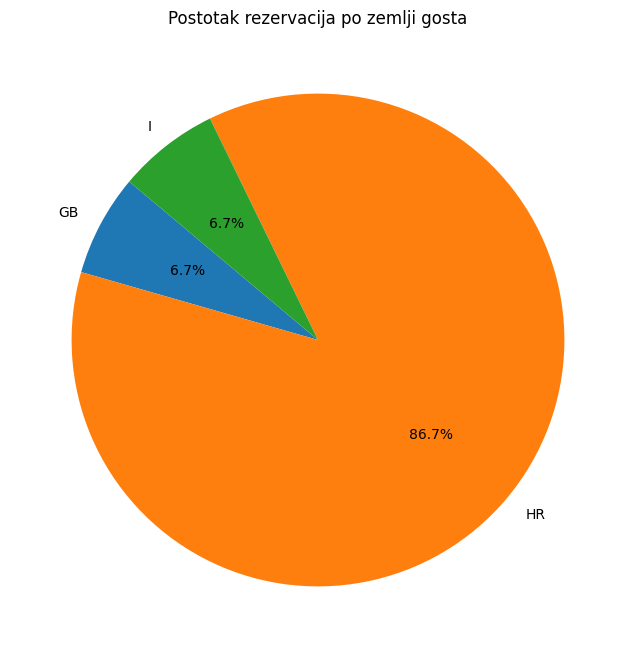

In [44]:
frekvencija_po_zemlji = third_february['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

In [45]:
february['adult_cnt'].mean()

27.862068965517242

In [46]:
108/february['adult_cnt'].mean()

3.876237623762376

Zakljucujemo da je Rijecki karveneval 2008. povecao broj dolazaka za 343%

Analiza utjecaja Rijeckog karnevala 2009. godine, koji se odrzao 22. veljace

In [47]:
february_2009 = dnevni_pregled_2009[dnevni_pregled_2009['date_from'].dt.month == 2]
february_2009

,date_from,adult_cnt
397,2009-02-01,14
398,2009-02-02,10
399,2009-02-03,46
400,2009-02-04,46
401,2009-02-05,28
402,2009-02-06,22
403,2009-02-07,11
404,2009-02-08,24
405,2009-02-09,3
406,2009-02-10,32


In [48]:
february_2009.mean()

date_from    2009-02-14 12:00:00
adult_cnt              31.178571
dtype: object

In [49]:
98/february_2009['adult_cnt'].mean()

3.143184421534937

Zakljucujemo da je Rijecki karveneval 2008. povecao broj dolazaka za 286% 

In [50]:
(98/february_2009['adult_cnt'].mean()+108/february['adult_cnt'].mean())/2

3.5097110226486565

Mozemo zakljuciti da je u prosjeku utjecak Rijeckog karnevala na broj dolazaka gostiju oko 314%

Analiza dogadaja u ozujku

In [51]:
march_2008 = dnevni_pregled_2008[dnevni_pregled_2008['date_from'].dt.month == 3]
march_2008

,date_from,adult_cnt
61,2008-03-01,50
62,2008-03-02,31
63,2008-03-03,14
64,2008-03-04,30
65,2008-03-05,24
66,2008-03-06,30
67,2008-03-07,26
68,2008-03-08,14
69,2008-03-09,17
70,2008-03-10,11


In [52]:
march_2008.mean()

date_from    2008-03-16 00:00:00
adult_cnt              27.451613
dtype: object

In [53]:
march_2009 = dnevni_pregled_2009[dnevni_pregled_2009['date_from'].dt.month == 3]
march_2009

,date_from,adult_cnt
425,2009-03-01,10
426,2009-03-02,16
427,2009-03-03,36
428,2009-03-04,35
429,2009-03-05,26
430,2009-03-06,28
431,2009-03-07,13
432,2009-03-08,15
433,2009-03-09,25
434,2009-03-10,32


In [54]:
march_2009.mean()

date_from    2009-03-16 00:00:00
adult_cnt              22.483871
dtype: object

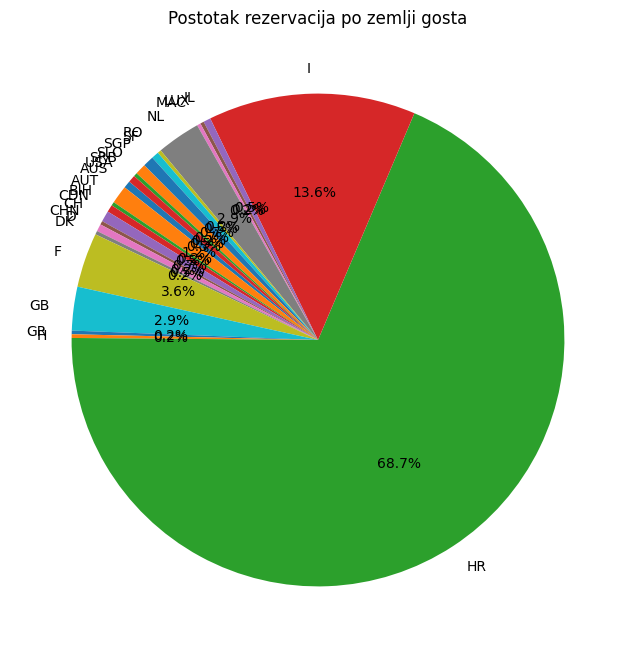

In [55]:
df_march = df_checkedOut_2008[df_checkedOut_2008['date_from'].dt.month == 3]
frekvencija_po_zemlji = df_march['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

In [56]:
df_march.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 2230 to 3473
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   reservation_id           419 non-null    int64         
 1   stay_date                419 non-null    datetime64[ns]
 2   guest_id                 419 non-null    int64         
 3   guest_country_id         419 non-null    object        
 4   reservation_status       419 non-null    object        
 5   reservation_date         419 non-null    datetime64[ns]
 6   date_from                419 non-null    datetime64[ns]
 7   date_to                  419 non-null    datetime64[ns]
 8   cancel_date              0 non-null      object        
 9   room_cnt                 419 non-null    int64         
 10  adult_cnt                419 non-null    int64         
 11  children_cnt             419 non-null    int64         
 12  price                    419 non-null

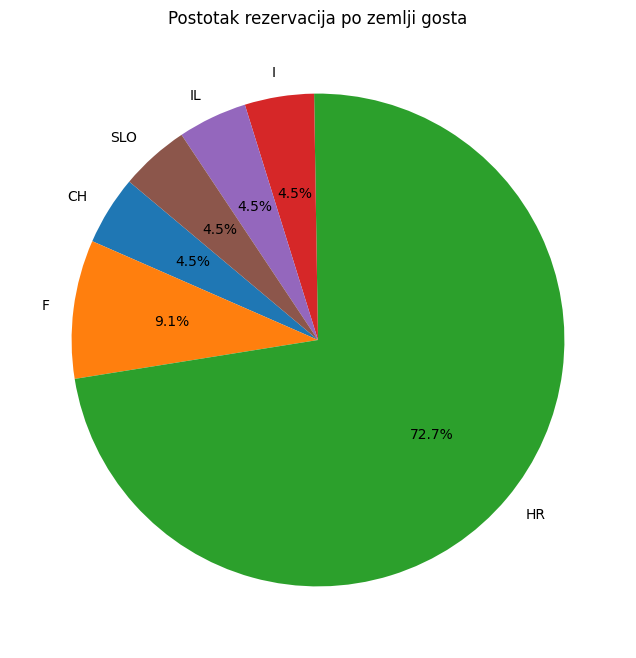

In [57]:
twentysix_march_2008 = df_march
twentysix_march_2008 = twentysix_march_2008[twentysix_march_2008['date_from'].dt.day == 26]
frekvencija_po_zemlji = twentysix_march_2008['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

Utjecaj Uskrsa na dolaznost.
2008. godine Uskrs pada na 23.3.2008, a 2009. 12.4.2009.

In [58]:
df_march_2008 = df_march
uskrs_2008 = df_march_2008
uskrs_2008 = uskrs_2008[uskrs_2008['date_from'].dt.day == 23]
uskrs_2008

,reservation_id,stay_date,guest_id,guest_country_id,reservation_status,reservation_date,date_from,date_to,cancel_date,room_cnt,adult_cnt,children_cnt,price,price_tax,total_price_tax,total_price,food_price,food_price_tax,other_price,other_price_tax,room_category_id,sales_channel_id,stay_nights,price_per_night,guest_count,nightly_price_per_guest
3087,76206,2008-03-23,55165,F,Checked-out,2008-03-12,2008-03-23,2008-03-24,None,1,2,0,5198.184,519.833,975.499,9592.638,623.785,62.415,3770.669,393.251,5,3.0,1.0,5198.184,2,2599.092000
3092,76529,2008-03-23,108165,I,Checked-out,2008-03-23,2008-03-23,2008-03-24,None,1,2,0,6593.579,659.336,721.751,7396.214,623.785,62.415,178.850,0.000,6,3.0,1.0,6593.579,2,3296.789500
3096,76526,2008-03-23,108158,I,Checked-out,2008-03-23,2008-03-23,2008-03-24,None,1,2,0,773.640,77.360,85.910,873.090,85.450,8.550,14.000,0.000,5,3.0,1.0,773.640,2,386.820000
3100,76528,2008-03-23,108161,I,Checked-out,2008-03-23,2008-03-23,2008-03-25,None,1,2,0,773.640,77.360,85.910,873.090,85.450,8.550,14.000,0.000,5,3.0,2.0,386.820,2,193.410000
3101,76503,2008-03-23,619,HR,Checked-out,2008-03-22,2008-03-23,2008-03-24,None,1,1,0,1612.716,161.257,199.655,2008.668,311.929,31.171,84.023,7.227,2,10.0,1.0,1612.716,1,1612.716000
3104,76527,2008-03-23,108160,I,Checked-out,2008-03-23,2008-03-23,2008-03-24,None,1,3,0,7195.829,719.561,813.147,8284.843,935.714,93.586,153.300,0.000,6,3.0,1.0,7195.829,3,2398.609667


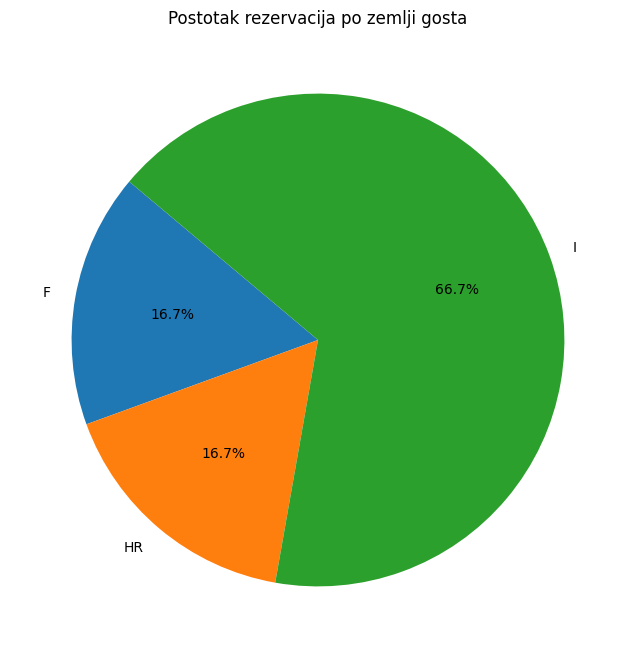

In [59]:
frekvencija_po_zemlji = uskrs_2008['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

In [60]:
df_april_2009 = df_checekedOut_2009[df_checekedOut_2009['date_from'].dt.month == 4]

In [61]:
uskrs_2009 = df_april_2009
uskrs_2009 = uskrs_2009[uskrs_2009['date_from'].dt.day == 12]

In [62]:
march_2008.mean()

date_from    2008-03-16 00:00:00
adult_cnt              27.451613
dtype: object

In [63]:
march_2008

,date_from,adult_cnt
61,2008-03-01,50
62,2008-03-02,31
63,2008-03-03,14
64,2008-03-04,30
65,2008-03-05,24
66,2008-03-06,30
67,2008-03-07,26
68,2008-03-08,14
69,2008-03-09,17
70,2008-03-10,11


In [64]:
12/march_2008['adult_cnt'].mean()

0.43713278495887187

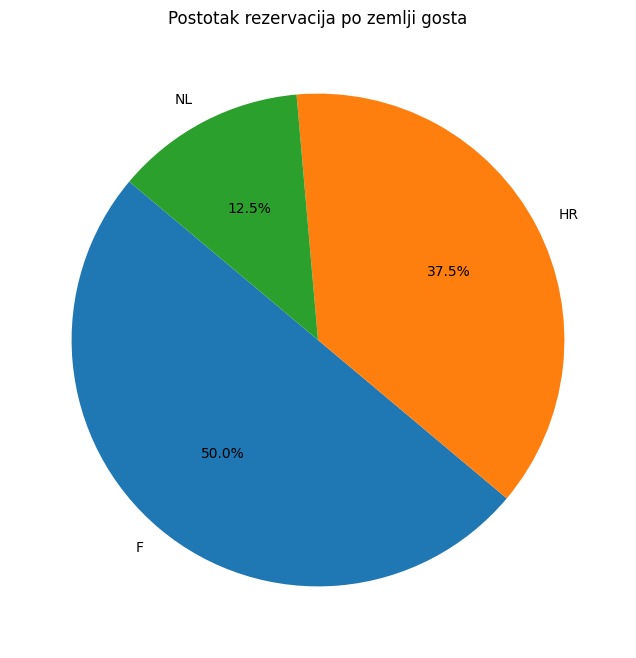

In [65]:
frekvencija_po_zemlji = uskrs_2009['guest_country_id'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_zemlji, labels=frekvencija_po_zemlji.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak rezervacija po zemlji gosta')
plt.show()

In [66]:
april_2009 = dnevni_pregled_2009[dnevni_pregled_2009['date_from'].dt.month == 4]
april_2009

,date_from,adult_cnt
456,2009-04-01,65
457,2009-04-02,40
458,2009-04-03,25
459,2009-04-04,14
460,2009-04-05,18
461,2009-04-06,25
462,2009-04-07,30
463,2009-04-08,35
464,2009-04-09,49
465,2009-04-10,60


In [67]:
april_2009.mean()

date_from    2009-04-15 12:00:00
adult_cnt              37.233333
dtype: object

In [68]:
19/april_2009['adult_cnt'].mean()

0.5102954341987467

In [69]:
(12/march_2008['adult_cnt'].mean()+0.4742096505823627)/2

0.45567121777061725

Vidimo da se broj dolaznosti za uskrs smanji 43%, te da gosti vecinom nisu iz hrvatske.

Analiza Travnja